<a href="https://colab.research.google.com/github/gluoneros/greenPredEnergy/blob/main/ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto Final - TalentoTech**
### **Predicción de viabilidad de proyectos de energia renovable en Colombia**

> El proyecto fue realizado en el marco del curso de AI-ML TalentoTech

## **Descripcion** 🚀
_Este proyecto utiliza Python y Jupyter Notebook, pandas, numpy para el desarrollo del modelo de predicción de proyectos de energia renobable en los municipios de Colombia._

## **Tecnologías** 📗
_Se utilizan las siguientes tecnologias para el desarrollo del proyecto:_

* [ Python ](https://www.python.org/) -- <img height="20" src="https://cdn.simpleicons.org/python?viewbox=auto" />
* [Jupyter](https://jupyter.org/) -- <img height="20" src="https://cdn.simpleicons.org/jupyter?viewbox=auto" />
* [Pandas](https://pandas.pydata.org/) -- <img height="20" src="https://cdn.simpleicons.org/pandas?viewbox=auto" />
* [Numpy](https://numpy.org/) -- <img height="20" src="https://cdn.simpleicons.org/numpy?viewbox=auto" />
* [Scikit-learn](https://scikit-learn.org/stable/) -- <img height="20" src="https://cdn.simpleicons.org/scikitlearn?viewbox=auto" />
* [github](https://github.com) --<img height="20" src="https://cdn.simpleicons.org/github?viewbox=auto" />

## **Autores** 😊

* **Monica Garcia**
* **Juan Pablo Cardenas**
* **Juan Pablo Quevedo**
* **Hildebrando Vargas**
* **Jonathan Gutierrez**
* **Mary Luz Ceballosl**

## **Tareas**  ✒️

 - [Importar librerías necesarias](#Importar librerías necesarias)
 2. Cargar los Datos
 3. Explore y visualice los datos para obtener información.
 4. Prepare los datos para los algoritmos de machine learning.
 5. Generación de Estadísticas Descriptivas
 6. Visualización de datos utilizando gráficos de barras, histogramas y gráficos de dispersión
 7. Identificación y manejo de valores atípicos y tendencias en los datos
 8. Uso de técnicas como imputación de la media, mediana y regresión para completar datos faltantes.
 9. Eliminación de registros con datos faltantes o imputación de valores categóricos.
 10. Cálculo de la correlación entre variables.
 11. Aplicación de técnicas de reducción de dimensionalidad para reducir la dimensionalidad de los datos.
 12. Aplicación de PCA para reducir la dimensionalidad de datasets
 13. Aplicación de técnicas de regresión para predecir valores de variables.
 14. Ajusta tu modelo.
 15. Presente su solución.
 16. Inicie, supervise y mantenga su sistema.

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

# Importar librerías necesarias

In [31]:
# importaciones
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# check modelos
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.model_selection import train_test_split
# check escaladores
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, Normalizer
# normalización
import unicodedata
# clientes
# !pip install sodapy
from sodapy import Socrata
client = Socrata("www.datos.gov.co", None)

### Métodos

In [32]:
# Metododo para eliminar acentos y caracteres especiales
def removeAccents(_value):
  value = _value.upper().replace("Ñ", "%")
  value = unicodedata.normalize("NFKD", value).encode("ascii","ignore").decode("ascii").replace("%", "Ñ")
  return value

## DataSet 1 | Estado de la prestación del servicio de energía en Zonas No Interconectadas

#### Predecir basados en 	'energia_activa',	'energia_reactiva', 'potencia_maxima' 'prom_diario_horas' [Ver](https://www.datos.gov.co/Minas-y-Energ-a/Estado-de-la-prestaci-n-del-servicio-de-energ-a-en/3ebi-d83g/about_data)
##### cual sería el día de demanda maxima para que una localidad en una zona no interconectada limitara y optimizara su uso de energía en funcion del posible ahorro de esta.Y los habitantes en sus viviendas emplearan con anticipacion dichas disminusiones en el consumo energético gracias al día de demanda maxima predicho.

In [33]:
d_zni_ = client.get("3ebi-d83g", limit=5000)
d_zni = pd.DataFrame.from_records(d_zni_)
d_zni = d_zni.rename(columns={"mpio": "municipio"})
d_zni

,id_dpto,dpto,id_mpio,municipio,id_localidad,localidad,anio,mes,energia_activa,energia_reactiva,potencia_maxima,dia_demanda_maxima,fecha_demanda_maxima,prom_diario_horas
0,91,AMAZONAS,91540,PUERTO NARIÑO,91540000,PUERTO NARIÑO (PUERTO NARIÑO - AMAZONAS),2024,05,132215,41907,286.4,Jueves,2024-05-23T18:00:00.000,24
1,91,AMAZONAS,91798,TARAPACA (ANM),91798000,TARAPACA (TARAPACA (ANM) - AMAZONAS),2024,05,28132,12662,102.6,Viernes,2024-05-03T18:30:00.000,10.16
2,5,ANTIOQUIA,5873,VIGÍA DEL FUERTE,5873010,LA PLAYA MURRI (VIGÍA DEL FUERTE - ANTIOQUIA),2024,05,2686,1110,27.46,Martes,2024-05-21T19:45:00.000,4.19
3,88,ARCHIPIÉLAGO DE SAN ANDRÉS y PROVIDENCIA,88564,PROVIDENCIA,88564000,PROVIDENCIA (PROVIDENCIA - ARCHIPIÉLAGO DE SAN...,2024,05,1331271,284638,2190.28,Viernes,2024-05-10T15:00:00.000,23.59
4,13,BOLÍVAR,13001,CARTAGENA DE INDIAS,13001007,ISLA FUERTE (CARTAGENA DE INDIAS - BOLÍVAR),2024,05,64368,30561,247.59,Sábado,2024-05-18T22:00:00.000,10.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4268,76,VALLE DEL CAUCA,76109,BUENAVENTURA,76109032,SAN FRANCISCO NAYA (BUENAVENTURA - VALLE DEL C...,2024,08,7610,3285,31.23,Viernes,2024-08-02T19:15:00.000,10.05
4269,97,VAUPÉS,97161,CARURÚ,97161000,CARURÚ (CARURÚ - VAUPÉS),2024,08,31775,7881,87.82,Jueves,2024-08-29T18:45:00.000,16.39
4270,97,VAUPÉS,97001,MITÚ,97001000,MITÚ (MITÚ - VAUPÉS),2024,08,1590470,387197,3236.71,Miércoles,2024-08-21T13:00:00.000,23.56
4271,97,VAUPÉS,97666,TARAIRA,97666000,TARAIRA (TARAIRA - VAUPÉS),2024,08,39226,10719,136.84,Martes,2024-08-20T12:00:00.000,13.01


In [34]:
# limpieza de datos
d_zni_min = d_zni[['municipio', 'anio', 'mes', 'energia_activa', 'energia_reactiva', 'potencia_maxima', 'prom_diario_horas']]
d_zni_min['energia_activa'] = round(d_zni_min[['energia_activa']].replace('NaN', pd.NA).fillna(0).astype(int))
d_zni_min['energia_reactiva'] = round(d_zni_min[['energia_reactiva']].replace('NaN', pd.NA).fillna(0).astype(float))
d_zni_min["municipio"] = d_zni_min["municipio"].apply(removeAccents)
d_zni_min = d_zni_min.groupby(["municipio"])[["energia_activa", "energia_reactiva"]].median()
d_zni_min

/tmp/ipykernel_21021/3061437187.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_zni_min['energia_activa'] = round(d_zni_min[['energia_activa']].replace('NaN', pd.NA).fillna(0).astype(int))
/tmp/ipykernel_21021/3061437187.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_zni_min['energia_reactiva'] = round(d_zni_min[['energia_reactiva']].replace('NaN', pd.NA).fillna(0).astype(float))
/tmp/ipykernel_21021/3061437187.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

,energia_activa,energia_reactiva
municipio,,
ACANDI,388026.0,142002.0
ALTO BAUDO,52554.0,18043.0
ALTO BAUDO (PIE DE PATO),46655.0,14585.0
BAHIA SOLANO,187949.0,68362.0
BAHIA SOLANO (MUTIS),150660.0,64680.0
...,...,...
TRINIDAD,12834.5,7221.5
TUMACO,14829.5,5409.5
UNGUIA,20480.0,8206.0


## DataSet2 | Energía renovable en Colombia
##### Utilizando 'Empleos_estimado',	'Usuarios', 'inversion,	'Capacidad_instalada, 'Energía' predecir cual sería un incremento significativo de desempeño de un proyecto Eolico y/o Solar a futuro para continuar invertiendo en el. [Ver](https://www.datos.gov.co/Minas-y-Energ-a/Meta-FNCER-Incorporar-en-la-matriz-energ-tica-nuev/vy9n-w6hc/about_data)

In [35]:
d_proj_ = client.get("vy9n-w6hc", limit=3000)
d_proj = pd.DataFrame.from_records(d_proj_)
d_proj = d_proj.rename(columns={"municipio": "municipio"})
d_proj

,proyecto,tipo,capacidad,departamento,municipio,codigo_departamento,codigo_municipio,fecha_estimada_fpo,energia_kwh_d_a,usuarios,inversi_n_estimada_cop,empleos_estimados,emisiones_co2_ton_a_o
0,JEPIRACHI,Eólico,18.42,LA GUAJIRA,URIBIA,44,44847,2004-04-27T00:00:00.000,176832,30665,79206000000,51,51635
1,AUTOG CELSIA SOLAR YUMBO,Solar,9.8,VALLE DEL CAUCA,YUMBO,76,76892,2017-03-09T00:00:00.000,47040,8157,42140000000,68,13736
2,CELSIA SOLAR BOLIVAR,Solar,8.06,BOLÍVAR,SANTA ROSA,13,13683,2019-02-01T00:00:00.000,38688,6709,34658000000,56,11297
3,EL PASO SOLAR (ENEL GREEN POWER),Solar,67.0,CESAR,EL PASO,20,20250,2019-04-05T00:00:00.000,321600,55769,288100000000,466,93907
4,SOLAR CASTILLA ECP,Solar,20.0,META,CASTILLA LA NUEVA,50,50150,2019-10-10T00:00:00.000,96000,16647,86000000000,139,28032
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,BUGA 1 PARTE 2,Solar,5.94,VALLE DEL CAUCA,"""""",76,76,2022-12-31T00:00:00.000,28512,4944,22275000000,41,8326
154,BUGA 1 PARTE 1,Solar,3.96,VALLE DEL CAUCA,"""""",76,76,2022-07-31T00:00:00.000,19008,3296,14850000000,28,5550
155,REFINERÍA GRB,Solar,21.0,SANTANDER,BARRANCABERMEJA,68,68081,2023-12-31T00:00:00.000,100800,17480,78750000000,146,29434
156,EMSA GD Y AG (34 Proyectos),Solar,1.9,META,VILLAVICENCIO,50,50001,2022-05-31T00:00:00.000,9120,1582,8170000000,13,2663


In [36]:
d_proj.describe()

,proyecto,tipo,capacidad,departamento,municipio,codigo_departamento,codigo_municipio,fecha_estimada_fpo,energia_kwh_d_a,usuarios,inversi_n_estimada_cop,empleos_estimados,emisiones_co2_ton_a_o
count,158,158,158,158,158,158,158,158,158,158,158,158,158
unique,156,2,104,26,79,26,81,70,106,106,112,75,106
top,"PARQUE SOLAR LA VICTORIA 1 Y 2 (2X19,9) PARTE 2",Solar,9.9,VALLE DEL CAUCA,URIBIA,76,44847,2022-05-31T00:00:00.000,47520,8240,37125000000,69,13876
freq,2,145,23,17,8,17,8,15,22,22,14,22,22


## DataSet 3 | Energía Per capita en Colombia

In [37]:
d_epc = pd.read_csv('https://raw.githubusercontent.com/owid/energy-data/refs/heads/master/owid-energy-data.csv')
d_epc

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2,ASEAN (Ember),2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
3,ASEAN (Ember),2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
4,ASEAN (Ember),2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21807,Zimbabwe,2019,ZWE,15354606.0,2.514642e+10,NaN,NaN,NaN,NaN,12.374,...,0.353,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
21808,Zimbabwe,2020,ZWE,15669663.0,2.317871e+10,NaN,NaN,NaN,NaN,6.382,...,0.298,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
21809,Zimbabwe,2021,ZWE,15993525.0,2.514009e+10,NaN,NaN,NaN,NaN,0.000,...,0.236,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
21810,Zimbabwe,2022,ZWE,16320539.0,2.590159e+10,NaN,NaN,NaN,NaN,6.127,...,0.336,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN


## d_ndll - DataSet 4 | No días Lluvia


In [91]:
d_ndll = pd.read_csv('https://raw.githubusercontent.com/gluoneros/talentoTech/refs/heads/main/noDiasLLuvia.csv')
d_ndll = d_ndll.rename(columns={"MUNICIPIO": "municipio"})
d_ndll['municipio'] = d_ndll['municipio'].str.upper()
d_ndll

,CODIGO,CATEGORIA,ESTACIÓN,municipio,DEPARTAMENTO,AO,ALTITUD (m),LONGITUD,LATITUD,ENE,...,JUN,JUL,AGO,SEP,OCT,NOV,DIC,ANUAL,Número de meses,% de cumplimiento
0,47067010,LM,El Encanto,EL ENCANTO,Amazonas,7,120,"-73,20","-1,77","14,3",...,"18,8","17,7","13,4","13,3","13,9","14,8","16,4","191,7",332,"92,2%"
1,47060010,PM,El Encato,EL ENCANTO,Amazonas,7,120,"-73,21","-1,75","14,3",...,"18,6","17,8","13,1","13,3","13,8","14,9","16,3","191,1",343,"95,3%"
2,44187030,LM,Bacuri,LA PEDRERA,Amazonas,4,101,"-69,47","-1,23","19,0",...,"20,3","19,6","16,5","14,5","15,1","15,0","18,8","216,0",343,"95,3%"
3,44187020,PM,La Pedrera,LA PEDRERA,Amazonas,4,102,"-69,59","-1,31","13,8",...,"14,7","13,5","12,4","11,2","12,0","12,1","13,3","161,8",334,"92,8%"
4,44157040,LM,Manacaro,LA PEDRERA,Amazonas,4,109,"-70,18","-1,53","18,3",...,"19,1","18,0","14,6","13,2","14,9","14,8","17,1","204,0",351,"97,5%"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1440,38015030,SP,Aeropuerto Puerto Carreño,PUERTO CARREÑO,Vichada,3,57,"-67,49","6,18","1,0",...,"21,2","21,9","19,7","14,3","12,3","7,9","2,9","133,2",359,"99,7%"
1441,38017040,LM,Casuarito,PUERTO CARREÑO,Vichada,3,65,"-67,64","5,68","2,1",...,"19,3","19,6","16,1","12,7","10,3","7,7","4,3","130,7",343,"95,3%"
1442,35260010,PM,Bonanza,SANTA ROSALÍA,Vichada,3,112,"-70,85","5,14","1,1",...,"14,4","15,1","13,2","10,0","8,9","5,9","2,7","98,7",324,"90,0%"
1443,35260030,PM,Hato Burrunay,SANTA ROSALÍA,Vichada,3,106,"-70,68","5,35","1,3",...,"15,3","17,1","14,0","12,1","10,8","7,7","3,6","113,4",349,"96,9%"


In [92]:
# d_ndll.describe()
d_ndll_min = d_ndll[['municipio', 'DEPARTAMENTO', 'ANUAL', 'ALTITUD (m)', 'LATITUD', 'LONGITUD']]
d_ndll_min = d_ndll_min.rename(columns={"ANUAL": "días_lluvia_año"})
d_ndll_min = d_ndll_min.rename(columns={"ALTITUD (m)": "altitud_m"})
d_ndll_min = d_ndll_min.rename(columns={"LATITUD": "latitud"})
d_ndll_min = d_ndll_min.rename(columns={"LONGITUD": "longitud"})
d_ndll_min = d_ndll_min.rename(columns={"DEPARTAMENTO": "departamento"})    
d_ndll_min

,municipio,departamento,días_lluvia_año,altitud_m,latitud,longitud
0,EL ENCANTO,Amazonas,"191,7",120,"-1,77","-73,20"
1,EL ENCANTO,Amazonas,"191,1",120,"-1,75","-73,21"
2,LA PEDRERA,Amazonas,"216,0",101,"-1,23","-69,47"
3,LA PEDRERA,Amazonas,"161,8",102,"-1,31","-69,59"
4,LA PEDRERA,Amazonas,"204,0",109,"-1,53","-70,18"
...,...,...,...,...,...,...
1440,PUERTO CARREÑO,Vichada,"133,2",57,"6,18","-67,49"
1441,PUERTO CARREÑO,Vichada,"130,7",65,"5,68","-67,64"
1442,SANTA ROSALÍA,Vichada,"98,7",112,"5,14","-70,85"
1443,SANTA ROSALÍA,Vichada,"113,4",106,"5,35","-70,68"


In [93]:
d_ndll_min.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1445 entries, 0 to 1444
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   municipio        1445 non-null   object
 1   departamento     1445 non-null   object
 2   días_lluvia_año  1445 non-null   object
 3   altitud_m        1445 non-null   int64 
 4   latitud          1445 non-null   object
 5   longitud         1445 non-null   object
dtypes: int64(1), object(5)
memory usage: 67.9+ KB


In [94]:
 # elimina espacios en blanco
d_ndll_min['días_lluvia_año'] = d_ndll_min['días_lluvia_año'].str.strip()
d_ndll_min['longitud'] = d_ndll_min['longitud'].str.strip()
d_ndll_min['latitud'] = d_ndll_min['latitud'].str.strip()
#d_ndll_min['ALTITUD (m)'] = d_ndll_min['ALTITUD (m)'].str.strip()

In [95]:
# Cambia comas por puntos en el campo
d_ndll_min['días_lluvia_año'] = d_ndll_min['días_lluvia_año'].str.replace(',', '.', regex=False)
d_ndll_min['longitud'] = d_ndll_min['longitud'].str.replace(',', '.', regex=False)
d_ndll_min['latitud'] = d_ndll_min['latitud'].str.replace(',', '.', regex=False)
d_ndll_min

,municipio,departamento,días_lluvia_año,altitud_m,latitud,longitud
0,EL ENCANTO,Amazonas,191.7,120,-1.77,-73.20
1,EL ENCANTO,Amazonas,191.1,120,-1.75,-73.21
2,LA PEDRERA,Amazonas,216.0,101,-1.23,-69.47
3,LA PEDRERA,Amazonas,161.8,102,-1.31,-69.59
4,LA PEDRERA,Amazonas,204.0,109,-1.53,-70.18
...,...,...,...,...,...,...
1440,PUERTO CARREÑO,Vichada,133.2,57,6.18,-67.49
1441,PUERTO CARREÑO,Vichada,130.7,65,5.68,-67.64
1442,SANTA ROSALÍA,Vichada,98.7,112,5.14,-70.85
1443,SANTA ROSALÍA,Vichada,113.4,106,5.35,-70.68


In [96]:
d_ndll_min.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1445 entries, 0 to 1444
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   municipio        1445 non-null   object
 1   departamento     1445 non-null   object
 2   días_lluvia_año  1445 non-null   object
 3   altitud_m        1445 non-null   int64 
 4   latitud          1445 non-null   object
 5   longitud         1445 non-null   object
dtypes: int64(1), object(5)
memory usage: 67.9+ KB


In [97]:
# conversion a numerico
d_ndll_min['días_lluvia_año'] = pd.to_numeric(d_ndll_min['días_lluvia_año'], errors='coerce')
d_ndll_min['latitud'] = pd.to_numeric(d_ndll_min['latitud'], errors='coerce')
d_ndll_min['longitud'] = pd.to_numeric(d_ndll_min['longitud'], errors='coerce')

In [98]:
d_ndll_min.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1445 entries, 0 to 1444
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   municipio        1445 non-null   object 
 1   departamento     1445 non-null   object 
 2   días_lluvia_año  1445 non-null   float64
 3   altitud_m        1445 non-null   int64  
 4   latitud          1445 non-null   float64
 5   longitud         1445 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 67.9+ KB


In [100]:
# Agrupar por municipio y calcular la media de dias_lluvia y las coordenadas de latitud, longitud y altitud
d_ndll_min = d_ndll_min.groupby('municipio').agg({'días_lluvia_año': 'mean', 'departamento': 'first', 'latitud': 'first', 'longitud': 'first', 'altitud_m': 'first'}).reset_index()
d_ndll_min

,municipio,días_lluvia_año,departamento,latitud,longitud,altitud_m
0,ABEJORRAL,177.800000,Antioquia,5.79,-75.43,2450
1,ABRIAQUÍ,200.600000,Antioquia,6.64,-76.08,1920
2,ACACÍAS,195.700000,Meta,3.99,-73.77,525
3,ACANDÍ,150.500000,Chocó,8.53,-77.28,2
4,ACEVEDO,157.650000,Huila,1.81,-75.94,1350
...,...,...,...,...,...,...
756,ZONA BANANERA,52.866667,Magdalena,10.68,-74.21,25
757,ÁBREGO,107.433333,Norte de Santander,8.09,-73.22,1430
758,ÍQUIRA,166.500000,Huila,2.66,-75.67,1650
759,ÚMBITA,170.200000,Boyacá,5.22,-73.44,2300


<Axes: xlabel='días_lluvia_año'>

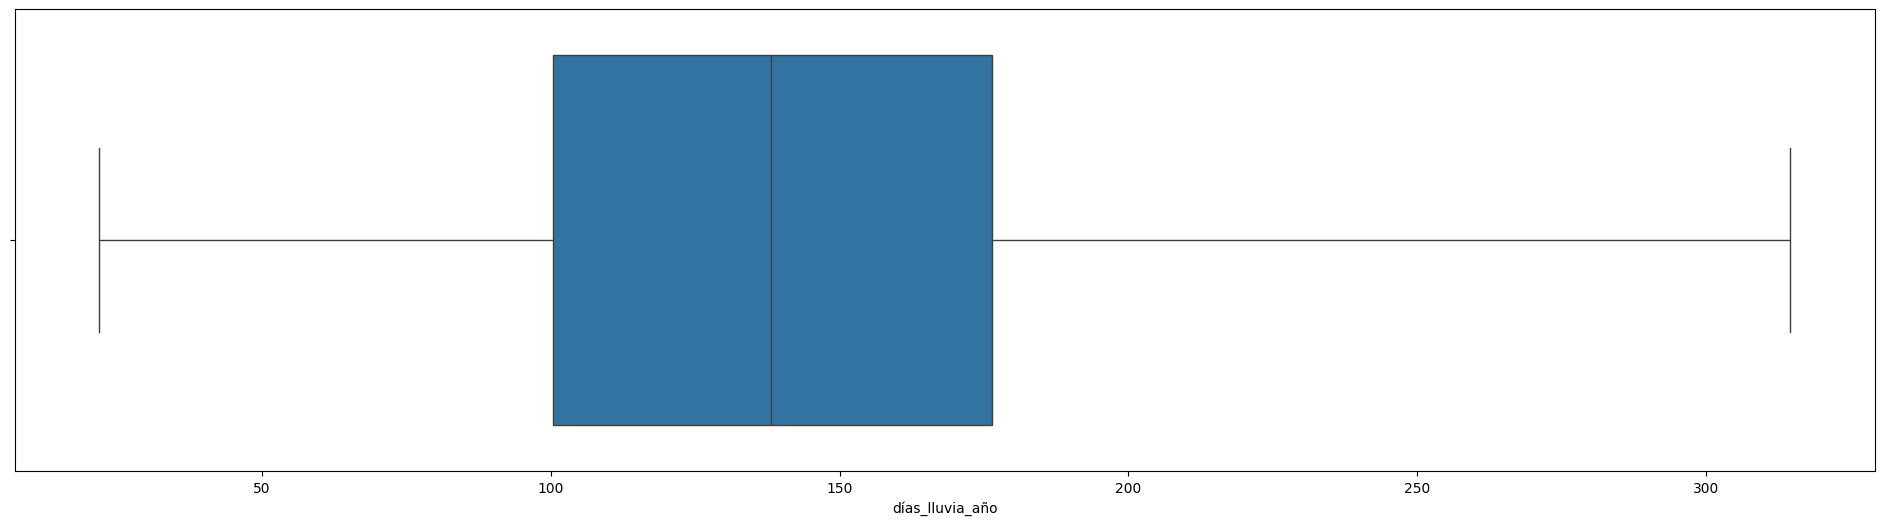

In [101]:
plt.figure(figsize=(24, 6))
# Remove the 'kind' argument, as it's not needed for sns.boxplot
sns.boxplot(x=d_ndll_min['días_lluvia_año'], whis=3)

## DataSet 5 | Velocidad Viento

In [102]:
d_vnt_ = client.get("sgfv-3yp8", limit=7000)
d_vnt = pd.DataFrame.from_records(d_vnt_)
d_vnt = d_vnt.rename(columns={"municipio": "municipio"})
d_vnt

,codigoestacion,codigosensor,fechaobservacion,valorobservado,nombreestacion,departamento,municipio,zonahidrografica,latitud,longitud,descripcionsensor,unidadmedida
0,0026055110,0103,2007-06-07T13:40:00.000,1,LA INDEPENDENCIA - AUT,VALLE DEL CAUCA,JAMUNDÍ,CAUCA,3.185361111,-76.56930556,Velocidad Viento (10 min),m/s
1,0021185090,0103,2013-05-20T23:00:00.000,0.7,NATAIMA - AUT,TOLIMA,ESPINAL,ALTO MAGDALENA,4.188138889,-74.96047222,Velocidad Viento (10 min),m/s
2,0026135310,0103,2008-03-10T18:00:00.000,4.9,STA ROSA - En Siniestro,RISARALDA,SANTA ROSA DE CABAL,CAUCA,4.847,-75.636,Velocidad Viento (10 min),m/s
3,0025025002,0103,2016-04-27T00:00:00.000,1.1,LOS ALAMOS,MAGDALENA,SAN SEBASTIÁN DE BUENAVISTA,BAJO MAGDALENA,9.304,-74.274,Velocidad Viento (10 min),m/s
4,2603500127,0103,2019-07-26T23:10:00.000,0.6,REMOLINO ALERTAS - EL VOLCAN - AUT,CAUCA,EL TAMBO,CAUCA,2.542913889,-76.852061111,Velocidad Viento (10 min),m/s
...,...,...,...,...,...,...,...,...,...,...,...,...
6995,0026055110,0103,2012-12-25T09:10:00.000,1.2,LA INDEPENDENCIA - AUT,VALLE DEL CAUCA,JAMUNDÍ,CAUCA,3.185361111,-76.56930556,Velocidad Viento (10 min),m/s
6996,0021115180,0103,2009-04-29T15:50:00.000,2.8,HACIENDA MANILA - AUT,HUILA,BARAYA,ALTO MAGDALENA,3.133055556,-75.08152778,Velocidad Viento (10 min),m/s
6997,0028025130,0103,2015-03-03T20:40:00.000,5.2,LA LOMA CARBONES - AUT,CESAR,EL PASO,CESAR,9.640611111,-73.52394444,Velocidad Viento (10 min),m/s
6998,0025025002,0103,2016-03-15T08:20:00.000,1.7,LOS ALAMOS,MAGDALENA,SAN SEBASTIÁN DE BUENAVISTA,BAJO MAGDALENA,9.304,-74.274,Velocidad Viento (10 min),m/s


In [103]:
# seleccionna las columnas que necesitamos
d_vnt_min = d_vnt[['departamento', 'municipio', 'valorobservado', 'latitud', 'longitud']]
d_vnt_min = d_vnt_min.rename(columns={"valorobservado": "velocidad_v_m/s"})
#d_vnt_min = d_vnt_min.rename(columns={"municipio": "municipio"})
d_vnt_min

,departamento,municipio,velocidad_v_m/s,latitud,longitud
0,VALLE DEL CAUCA,JAMUNDÍ,1,3.185361111,-76.56930556
1,TOLIMA,ESPINAL,0.7,4.188138889,-74.96047222
2,RISARALDA,SANTA ROSA DE CABAL,4.9,4.847,-75.636
3,MAGDALENA,SAN SEBASTIÁN DE BUENAVISTA,1.1,9.304,-74.274
4,CAUCA,EL TAMBO,0.6,2.542913889,-76.852061111
...,...,...,...,...,...
6995,VALLE DEL CAUCA,JAMUNDÍ,1.2,3.185361111,-76.56930556
6996,HUILA,BARAYA,2.8,3.133055556,-75.08152778
6997,CESAR,EL PASO,5.2,9.640611111,-73.52394444
6998,MAGDALENA,SAN SEBASTIÁN DE BUENAVISTA,1.7,9.304,-74.274


In [104]:
#pasar a float
d_vnt_min['velocidad_v_m/s'] = pd.to_numeric(d_vnt_min ['velocidad_v_m/s'], errors='coerce')
d_vnt_min['latitud'] = pd.to_numeric(d_vnt_min ['latitud'], errors='coerce')
d_vnt_min['longitud'] = pd.to_numeric(d_vnt_min ['longitud'], errors='coerce')

In [105]:
#Borrar tildes
d_vnt_min['departamento'] = d_vnt_min['departamento'].str.replace(u"é", "e")
d_vnt_min['departamento'] = d_vnt_min['departamento'].str.replace(u"í", "i")
d_vnt_min['departamento'] = d_vnt_min['departamento'].str.replace(u"ó", "o")
d_vnt_min['departamento'] = d_vnt_min['departamento'].str.replace(u"ú", "u")
d_vnt_min['departamento'] = d_vnt_min['departamento'].str.replace(u"á", "a")
d_vnt_min['departamento'] = d_vnt_min['departamento'].str.replace(u"Á", "A")
d_vnt_min['departamento'] = d_vnt_min['departamento'].str.replace(u"É", "E")
d_vnt_min['departamento'] = d_vnt_min['departamento'].str.replace(u"Í", "I")
d_vnt_min['departamento'] = d_vnt_min['departamento'].str.replace(u"Ó", "O")
d_vnt_min['departamento'] = d_vnt_min['departamento'].str.replace(u"Ú", "U")    


In [106]:
# Agrupar por 'deparatamento' y calcular la media de 'velocidad_v_m/s' para cada uno
# Calcular la media de 'velocidad_v_m/s' por 'departamento' y agregarla como nueva columna
d_vnt_min['mediaxdeparatamento'] = d_vnt_min.groupby('departamento')['velocidad_v_m/s'].transform('mean')
d_vnt_min

,departamento,municipio,velocidad_v_m/s,latitud,longitud,mediaxdeparatamento
0,VALLE DEL CAUCA,JAMUNDÍ,1.000000,3.185361,-76.569306,1.698122
1,TOLIMA,ESPINAL,0.700000,4.188139,-74.960472,2.027610
2,RISARALDA,SANTA ROSA DE CABAL,4.900000,4.847000,-75.636000,1.532922
3,MAGDALENA,SAN SEBASTIÁN DE BUENAVISTA,1.100000,9.304000,-74.274000,2.056359
4,CAUCA,EL TAMBO,0.600000,2.542914,-76.852061,2.182627
...,...,...,...,...,...,...
6995,VALLE DEL CAUCA,JAMUNDÍ,1.200000,3.185361,-76.569306,1.698122
6996,HUILA,BARAYA,2.800000,3.133056,-75.081528,1.752103
6997,CESAR,EL PASO,5.200000,9.640611,-73.523944,2.628647
6998,MAGDALENA,SAN SEBASTIÁN DE BUENAVISTA,1.700000,9.304000,-74.274000,2.056359


In [107]:
# Agrupar por 'municipio' y calcular la media de 'velocidad_v_m/s' para cada uno
d_vnt_min['mediaxmunicipio'] = d_vnt_min.groupby('municipio')['velocidad_v_m/s'].transform('mean')

d_vnt_min


,departamento,municipio,velocidad_v_m/s,latitud,longitud,mediaxdeparatamento,mediaxmunicipio
0,VALLE DEL CAUCA,JAMUNDÍ,1.000000,3.185361,-76.569306,1.698122,1.436361
1,TOLIMA,ESPINAL,0.700000,4.188139,-74.960472,2.027610,1.706977
2,RISARALDA,SANTA ROSA DE CABAL,4.900000,4.847000,-75.636000,1.532922,2.620164
3,MAGDALENA,SAN SEBASTIÁN DE BUENAVISTA,1.100000,9.304000,-74.274000,2.056359,0.855556
4,CAUCA,EL TAMBO,0.600000,2.542914,-76.852061,2.182627,1.580952
...,...,...,...,...,...,...,...
6995,VALLE DEL CAUCA,JAMUNDÍ,1.200000,3.185361,-76.569306,1.698122,1.436361
6996,HUILA,BARAYA,2.800000,3.133056,-75.081528,1.752103,1.661905
6997,CESAR,EL PASO,5.200000,9.640611,-73.523944,2.628647,2.737143
6998,MAGDALENA,SAN SEBASTIÁN DE BUENAVISTA,1.700000,9.304000,-74.274000,2.056359,0.855556


<Axes: xlabel='velocidad_v_m/s'>

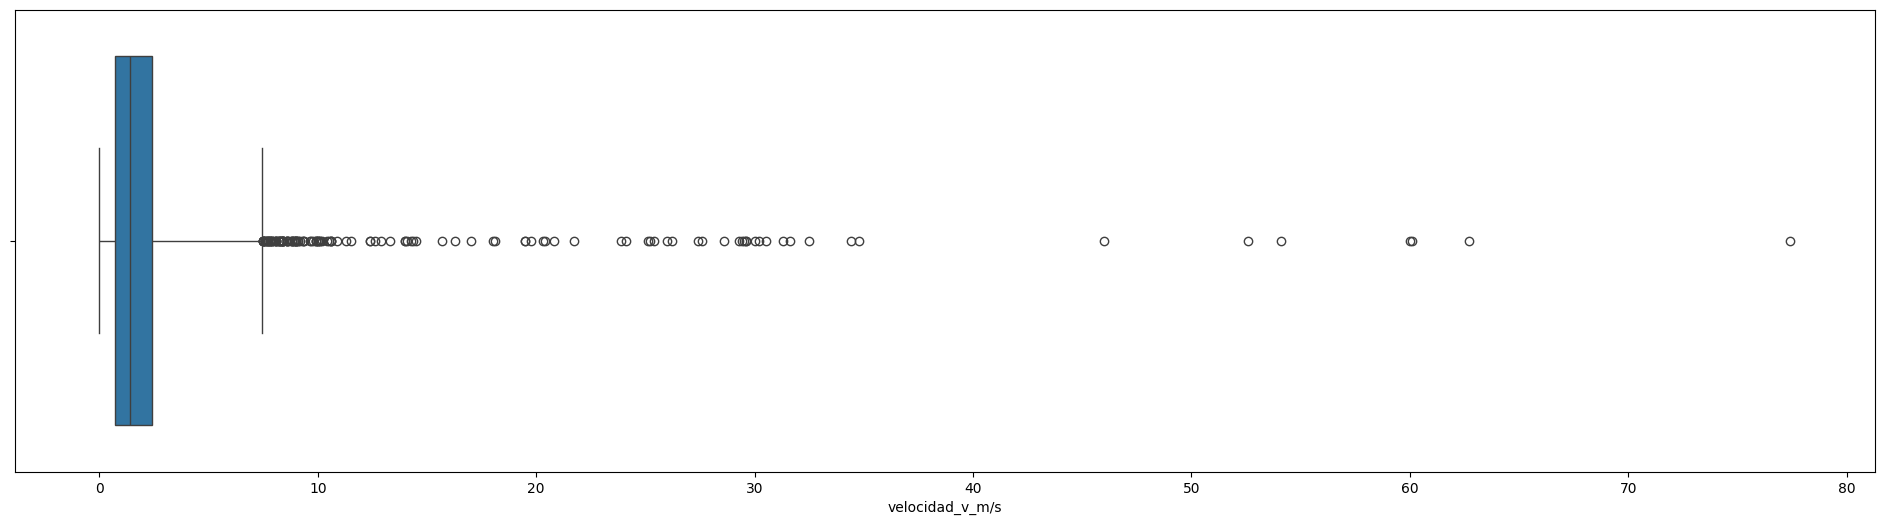

In [108]:
plt.figure(figsize=(24, 6))
# Remove the 'kind' argument, as it's not needed for sns.boxplot
sns.boxplot(x=d_vnt_min['velocidad_v_m/s'], whis=3)

## d_cpc - DataSet 6 | Centros poblados de Colombia

In [133]:
# d_cpc = pd.read_csv("https://raw.githubusercontent.com/gluoneros/talentoTech/refs/heads/main/DIVIPOLA_CentrosPoblados.csv", encoding="utf-8", delimiter=";",skiprows=2, header=None).iloc[:, 2:]
d_cpc = pd.read_csv("https://raw.githubusercontent.com/gluoneros/talentoTech/refs/heads/main/DIVIPOLA_CentrosPoblados.csv", encoding="utf-8", delimiter=";").iloc[:, 2:]

d_cpc

,Código.1,Nombre.1,Código.2,Nombre.2,Tipo,Longitud,Latitud
0,5001,MEDELLÍN,5001000,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",CM,"-75,578661","6,250063"
1,5001,MEDELLÍN,5001001,PALMITAS,CP,"-75,690039","6,343329"
2,5001,MEDELLÍN,5001004,SANTA ELENA,CP,"-75,501293","6,210599"
3,5001,MEDELLÍN,5001009,ALTAVISTA,CP,"-75,644721","6,220472"
4,5001,MEDELLÍN,5001010,AGUAS FRÍAS,CP,"-75,635261","6,232665"
...,...,...,...,...,...,...,...
8156,99773,CUMARIBO,99773028,GUACO BAJO,CP,NaN,NaN
8157,99773,CUMARIBO,99773029,GUACO ALTO,CP,NaN,NaN
8158,99773,CUMARIBO,99773030,CAÑO BOCÓN,CP,NaN,NaN
8159,99773,CUMARIBO,99773031,CAMUNIANAE,CP,NaN,NaN


In [134]:
# cambiar el nombre de las columnas para que coincidan con el nombre de las variables en el notebook
d_cpc = d_cpc.rename(columns={"Nombre.1": "municipio"})
d_cpc = d_cpc.rename(columns={"Nombre.2": "poblacion"})
d_cpc = d_cpc.rename(columns={"Longitud": "longitud"})
d_cpc = d_cpc.rename(columns={"Latitud": "latitud"})

In [135]:
# seleccionar columnas de interes
d_cpc_min = d_cpc[['municipio', 'poblacion', 'longitud', 'latitud']]
d_cpc_min

,municipio,poblacion,longitud,latitud
0,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...","-75,578661","6,250063"
1,MEDELLÍN,PALMITAS,"-75,690039","6,343329"
2,MEDELLÍN,SANTA ELENA,"-75,501293","6,210599"
3,MEDELLÍN,ALTAVISTA,"-75,644721","6,220472"
4,MEDELLÍN,AGUAS FRÍAS,"-75,635261","6,232665"
...,...,...,...,...
8156,CUMARIBO,GUACO BAJO,NaN,NaN
8157,CUMARIBO,GUACO ALTO,NaN,NaN
8158,CUMARIBO,CAÑO BOCÓN,NaN,NaN
8159,CUMARIBO,CAMUNIANAE,NaN,NaN


In [136]:
d_cpc_min.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8161 entries, 0 to 8160
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   municipio  8161 non-null   object
 1   poblacion  8161 non-null   object
 2   longitud   7728 non-null   object
 3   latitud    7728 non-null   object
dtypes: object(4)
memory usage: 255.2+ KB


In [137]:
# Cambia comas por puntos en el campo 'dias_lluvia'
d_cpc_min['latitud'] = d_cpc_min['latitud'].str.replace(',', '.', regex=False)
d_cpc_min['longitud'] = d_cpc_min['longitud'].str.replace(',', '.', regex=False)

/tmp/ipykernel_21021/1169610433.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_cpc_min['latitud'] = d_cpc_min['latitud'].str.replace(',', '.', regex=False)
/tmp/ipykernel_21021/1169610433.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_cpc_min['longitud'] = d_cpc_min['longitud'].str.replace(',', '.', regex=False)


In [138]:
d_cpc_min.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8161 entries, 0 to 8160
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   municipio  8161 non-null   object
 1   poblacion  8161 non-null   object
 2   longitud   7728 non-null   object
 3   latitud    7728 non-null   object
dtypes: object(4)
memory usage: 255.2+ KB


In [139]:
#Eliminar filas con NA
d_cpc_min.dropna(inplace=True)
d_cpc_min

/tmp/ipykernel_21021/1180263269.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_cpc_min.dropna(inplace=True)


,municipio,poblacion,longitud,latitud
0,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063
1,MEDELLÍN,PALMITAS,-75.690039,6.343329
2,MEDELLÍN,SANTA ELENA,-75.501293,6.210599
3,MEDELLÍN,ALTAVISTA,-75.644721,6.220472
4,MEDELLÍN,AGUAS FRÍAS,-75.635261,6.232665
...,...,...,...,...
8151,CUMARIBO,EL TUPARRO,-69.062984,4.887093
8152,CUMARIBO,BRISA,-69.773596,4.343518
8153,CUMARIBO,GUATURIBA,-69.854645,4.34513
8154,CUMARIBO,MATSULDANI,-69.797888,4.342496


In [140]:
# pasar a numerico
d_cpc_min['latitud'] = pd.to_numeric(d_cpc_min['latitud'], errors='coerce')
d_cpc_min['longitud'] = pd.to_numeric(d_cpc_min['longitud'], errors='coerce')
d_cpc_min

/tmp/ipykernel_21021/4085144221.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_cpc_min['latitud'] = pd.to_numeric(d_cpc_min['latitud'], errors='coerce')
/tmp/ipykernel_21021/4085144221.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_cpc_min['longitud'] = pd.to_numeric(d_cpc_min['longitud'], errors='coerce')


,municipio,poblacion,longitud,latitud
0,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063
1,MEDELLÍN,PALMITAS,-75.690039,6.343329
2,MEDELLÍN,SANTA ELENA,-75.501293,6.210599
3,MEDELLÍN,ALTAVISTA,-75.644721,6.220472
4,MEDELLÍN,AGUAS FRÍAS,-75.635261,6.232665
...,...,...,...,...
8151,CUMARIBO,EL TUPARRO,-69.062984,4.887093
8152,CUMARIBO,BRISA,-69.773596,4.343518
8153,CUMARIBO,GUATURIBA,-69.854645,4.345130
8154,CUMARIBO,MATSULDANI,-69.797888,4.342496


In [141]:
d_cpc_min.isna().sum()

municipio    0
poblacion    0
longitud     0
latitud      0
dtype: int64

In [150]:
# merge dataframes lluvia y viento
df_main = pd.merge(left=d_cpc_min, right=d_vnt_min, left_on='municipio', right_on='municipio', how='left')
df_main

,municipio,poblacion,longitud_x,latitud_x,departamento,velocidad_v_m/s,latitud_y,longitud_y,mediaxdeparatamento,mediaxmunicipio
0,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063,ANTIOQUIA,1.9,6.286333,-75.612792,1.631989,1.985393
1,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063,ANTIOQUIA,0.3,6.253000,-75.550000,1.631989,1.985393
2,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063,ANTIOQUIA,1.2,6.286333,-75.612792,1.631989,1.985393
3,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063,ANTIOQUIA,3.3,6.286333,-75.612792,1.631989,1.985393
4,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063,ANTIOQUIA,1.3,6.221000,-75.589000,1.631989,1.985393
...,...,...,...,...,...,...,...,...,...,...
80858,CUMARIBO,EL TUPARRO,-69.062984,4.887093,NaN,NaN,NaN,NaN,NaN,NaN
80859,CUMARIBO,BRISA,-69.773596,4.343518,NaN,NaN,NaN,NaN,NaN,NaN
80860,CUMARIBO,GUATURIBA,-69.854645,4.345130,NaN,NaN,NaN,NaN,NaN,NaN
80861,CUMARIBO,MATSULDANI,-69.797888,4.342496,NaN,NaN,NaN,NaN,NaN,NaN


In [151]:
df_main.isnull().sum()

municipio                 0
poblacion                 0
longitud_x                0
latitud_x                 0
departamento           4866
velocidad_v_m/s        4866
latitud_y              4866
longitud_y             4866
mediaxdeparatamento    4866
mediaxmunicipio        4866
dtype: int64

In [152]:
# Calcular la media por municipio
municipio_means = df_main.groupby('municipio')['velocidad_v_m/s'].mean()

<Axes: xlabel='velocidad_v_m/s'>

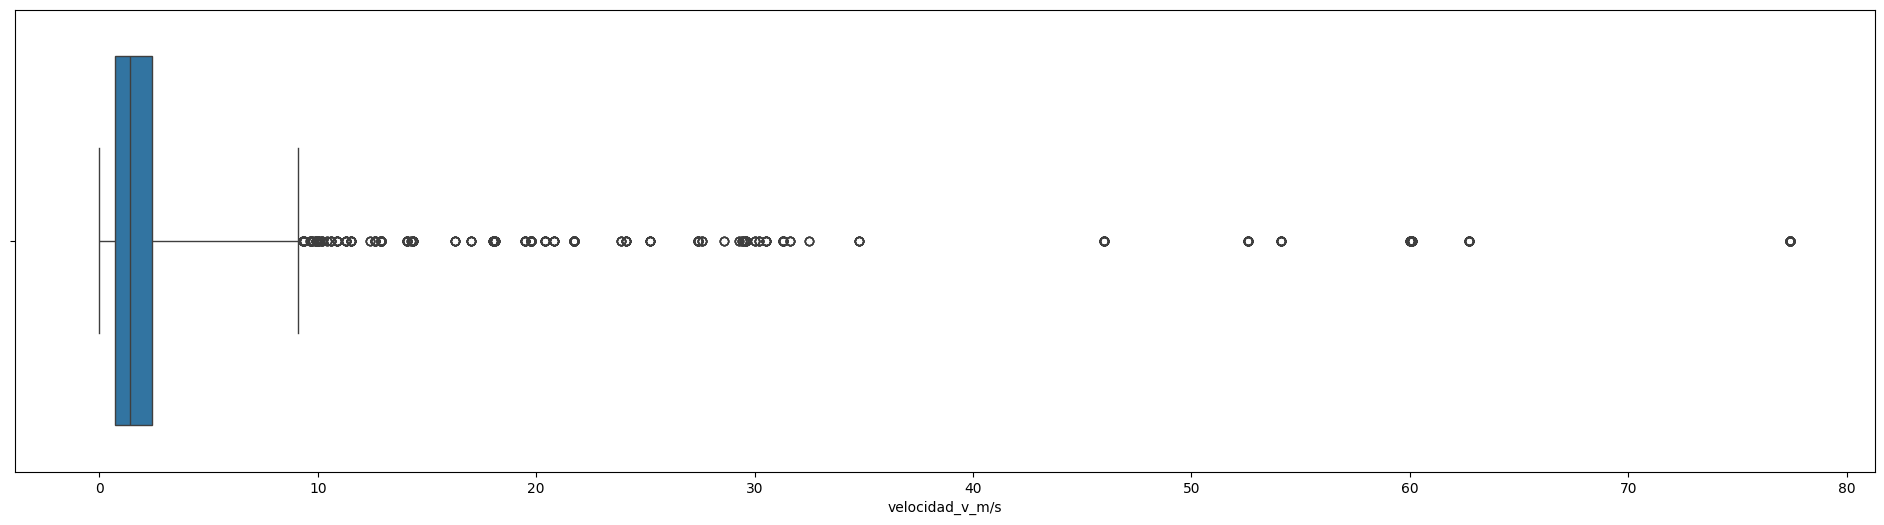

In [153]:
plt.figure(figsize=(24, 6))
# Remove the 'kind' argument, as it's not needed for sns.boxplot
sns.boxplot(x=df_main['velocidad_v_m/s'], whis=4)

In [146]:
# Rellenar los valores nulos usando la media por municipio
df_main['velocidad_v_m/s'] = df_main.apply(
    lambda row: municipio_means[row['municipio']] if pd.isnull(row['velocidad_v_m/s']) else row['velocidad_v_m/s'],
    axis=1
)
df_main


,municipio,poblacion,longitud_x,latitud_x,departamento,velocidad_v_m/s,latitud_y,longitud_y,mediaxdeparatamento,mediaxmunicipio
0,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063,ANTIOQUIA,1.9,6.286333,-75.612792,1.631989,1.985393
1,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063,ANTIOQUIA,0.3,6.253000,-75.550000,1.631989,1.985393
2,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063,ANTIOQUIA,1.2,6.286333,-75.612792,1.631989,1.985393
3,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063,ANTIOQUIA,3.3,6.286333,-75.612792,1.631989,1.985393
4,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063,ANTIOQUIA,1.3,6.221000,-75.589000,1.631989,1.985393
...,...,...,...,...,...,...,...,...,...,...
80858,CUMARIBO,EL TUPARRO,-69.062984,4.887093,NaN,NaN,NaN,NaN,NaN,NaN
80859,CUMARIBO,BRISA,-69.773596,4.343518,NaN,NaN,NaN,NaN,NaN,NaN
80860,CUMARIBO,GUATURIBA,-69.854645,4.345130,NaN,NaN,NaN,NaN,NaN,NaN
80861,CUMARIBO,MATSULDANI,-69.797888,4.342496,NaN,NaN,NaN,NaN,NaN,NaN


In [154]:
df_main.isnull().sum()

municipio                 0
poblacion                 0
longitud_x                0
latitud_x                 0
departamento           4866
velocidad_v_m/s        4866
latitud_y              4866
longitud_y             4866
mediaxdeparatamento    4866
mediaxmunicipio        4866
dtype: int64

In [156]:
# Rellenar los valores NaN en 'velocidad_v_m/s' con la media por departamento
df_main['velocidad_v_m/s'].fillna(df_main['mediaxdeparatamento'], inplace=True)
df_main


/tmp/ipykernel_21021/1825517107.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_main['velocidad_v_m/s'].fillna(df_main['mediaxdeparatamento'], inplace=True)


,municipio,poblacion,longitud_x,latitud_x,departamento,velocidad_v_m/s,latitud_y,longitud_y,mediaxdeparatamento,mediaxmunicipio
0,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063,ANTIOQUIA,1.9,6.286333,-75.612792,1.631989,1.985393
1,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063,ANTIOQUIA,0.3,6.253000,-75.550000,1.631989,1.985393
2,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063,ANTIOQUIA,1.2,6.286333,-75.612792,1.631989,1.985393
3,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063,ANTIOQUIA,3.3,6.286333,-75.612792,1.631989,1.985393
4,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063,ANTIOQUIA,1.3,6.221000,-75.589000,1.631989,1.985393
...,...,...,...,...,...,...,...,...,...,...
80858,CUMARIBO,EL TUPARRO,-69.062984,4.887093,NaN,NaN,NaN,NaN,NaN,NaN
80859,CUMARIBO,BRISA,-69.773596,4.343518,NaN,NaN,NaN,NaN,NaN,NaN
80860,CUMARIBO,GUATURIBA,-69.854645,4.345130,NaN,NaN,NaN,NaN,NaN,NaN
80861,CUMARIBO,MATSULDANI,-69.797888,4.342496,NaN,NaN,NaN,NaN,NaN,NaN


In [157]:
df_main.isnull().sum()

municipio                 0
poblacion                 0
longitud_x                0
latitud_x                 0
departamento           4866
velocidad_v_m/s        4866
latitud_y              4866
longitud_y             4866
mediaxdeparatamento    4866
mediaxmunicipio        4866
dtype: int64

In [158]:
# Rellenar los valores nulos de la tabla de datos
df_main.fillna(df_main['velocidad_v_m/s'].mean(), inplace=True)

In [159]:
df_main.isnull().sum()

municipio              0
poblacion              0
longitud_x             0
latitud_x              0
departamento           0
velocidad_v_m/s        0
latitud_y              0
longitud_y             0
mediaxdeparatamento    0
mediaxmunicipio        0
dtype: int64

<Axes: xlabel='velocidad_v_m/s'>

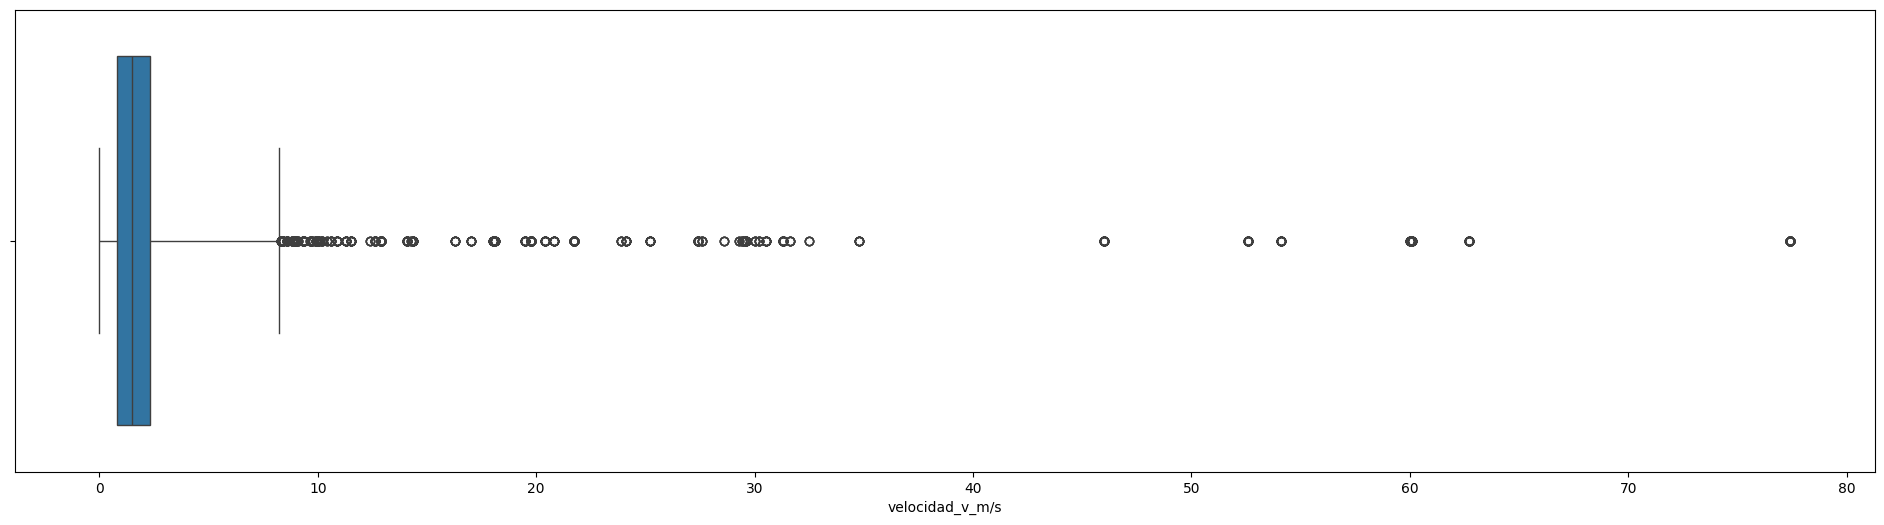

In [160]:
plt.figure(figsize=(24, 6))
# Remove the 'kind' argument, as it's not needed for sns.boxplot
sns.boxplot(x=df_main['velocidad_v_m/s'], whis=4)

## Viabilidad de proyecto eólico

In [204]:
df_viabilidad = pd.merge(left=df_main, right=d_ndll_min, left_on='municipio', right_on='municipio', how='left')
df_viabilidad

,municipio,poblacion,longitud_x,latitud_x,departamento_x,velocidad_v_m/s,latitud_y,longitud_y,mediaxdeparatamento,mediaxmunicipio,días_lluvia_año,departamento_y,latitud,longitud,altitud_m
0,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063,ANTIOQUIA,1.900000,6.286333,-75.612792,1.631989,1.985393,180.460000,Antioquia,6.26,-75.68,2450.0
1,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063,ANTIOQUIA,0.300000,6.253000,-75.550000,1.631989,1.985393,180.460000,Antioquia,6.26,-75.68,2450.0
2,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063,ANTIOQUIA,1.200000,6.286333,-75.612792,1.631989,1.985393,180.460000,Antioquia,6.26,-75.68,2450.0
3,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063,ANTIOQUIA,3.300000,6.286333,-75.612792,1.631989,1.985393,180.460000,Antioquia,6.26,-75.68,2450.0
4,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063,ANTIOQUIA,1.300000,6.221000,-75.589000,1.631989,1.985393,180.460000,Antioquia,6.26,-75.68,2450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80858,CUMARIBO,EL TUPARRO,-69.062984,4.887093,2.135353,2.135353,2.135353,2.135353,2.135353,2.135353,155.516667,Vichada,3.99,-68.32,94.0
80859,CUMARIBO,BRISA,-69.773596,4.343518,2.135353,2.135353,2.135353,2.135353,2.135353,2.135353,155.516667,Vichada,3.99,-68.32,94.0
80860,CUMARIBO,GUATURIBA,-69.854645,4.345130,2.135353,2.135353,2.135353,2.135353,2.135353,2.135353,155.516667,Vichada,3.99,-68.32,94.0
80861,CUMARIBO,MATSULDANI,-69.797888,4.342496,2.135353,2.135353,2.135353,2.135353,2.135353,2.135353,155.516667,Vichada,3.99,-68.32,94.0


In [205]:
df_viabilidad.isnull().sum()

municipio                  0
poblacion                  0
longitud_x                 0
latitud_x                  0
departamento_x             0
velocidad_v_m/s            0
latitud_y                  0
longitud_y                 0
mediaxdeparatamento        0
mediaxmunicipio            0
días_lluvia_año        18402
departamento_y         18402
latitud                18402
longitud               18402
altitud_m              18402
dtype: int64

In [206]:
# borrar columnas que no necesitamos
df_viabilidad = df_viabilidad.drop(columns=['longitud_y'])
df_viabilidad = df_viabilidad.drop(columns=['latitud_y'])
df_viabilidad

,municipio,poblacion,longitud_x,latitud_x,departamento_x,velocidad_v_m/s,mediaxdeparatamento,mediaxmunicipio,días_lluvia_año,departamento_y,latitud,longitud,altitud_m
0,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063,ANTIOQUIA,1.900000,1.631989,1.985393,180.460000,Antioquia,6.26,-75.68,2450.0
1,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063,ANTIOQUIA,0.300000,1.631989,1.985393,180.460000,Antioquia,6.26,-75.68,2450.0
2,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063,ANTIOQUIA,1.200000,1.631989,1.985393,180.460000,Antioquia,6.26,-75.68,2450.0
3,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063,ANTIOQUIA,3.300000,1.631989,1.985393,180.460000,Antioquia,6.26,-75.68,2450.0
4,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063,ANTIOQUIA,1.300000,1.631989,1.985393,180.460000,Antioquia,6.26,-75.68,2450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80858,CUMARIBO,EL TUPARRO,-69.062984,4.887093,2.135353,2.135353,2.135353,2.135353,155.516667,Vichada,3.99,-68.32,94.0
80859,CUMARIBO,BRISA,-69.773596,4.343518,2.135353,2.135353,2.135353,2.135353,155.516667,Vichada,3.99,-68.32,94.0
80860,CUMARIBO,GUATURIBA,-69.854645,4.345130,2.135353,2.135353,2.135353,2.135353,155.516667,Vichada,3.99,-68.32,94.0
80861,CUMARIBO,MATSULDANI,-69.797888,4.342496,2.135353,2.135353,2.135353,2.135353,155.516667,Vichada,3.99,-68.32,94.0


In [207]:
df_viabilidad.isnull().sum()

municipio                  0
poblacion                  0
longitud_x                 0
latitud_x                  0
departamento_x             0
velocidad_v_m/s            0
mediaxdeparatamento        0
mediaxmunicipio            0
días_lluvia_año        18402
departamento_y         18402
latitud                18402
longitud               18402
altitud_m              18402
dtype: int64

<Axes: xlabel='velocidad_v_m/s'>

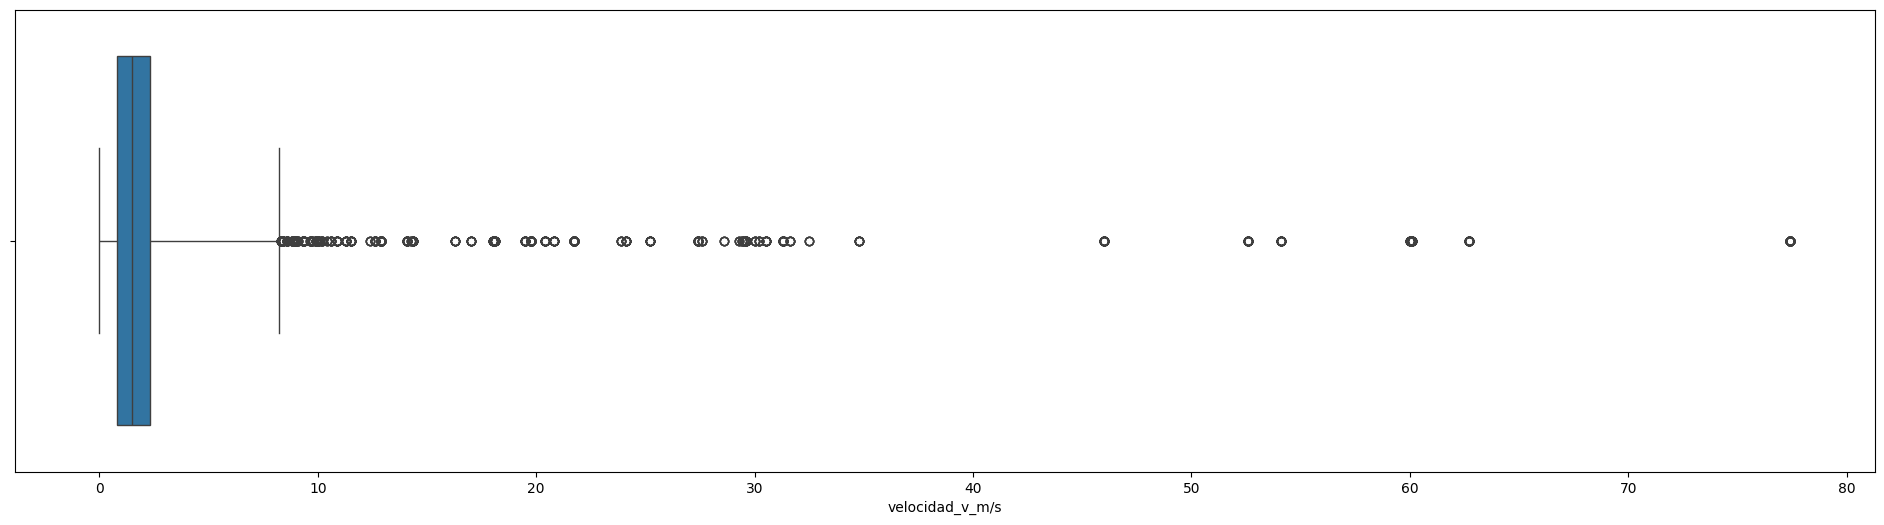

In [208]:
plt.figure(figsize=(24, 6))
# Remove the 'kind' argument, as it's not needed for sns.boxplot
sns.boxplot(x=df_viabilidad['velocidad_v_m/s'], whis=4)

In [209]:
#
df_viabilidad.fillna(df_viabilidad['días_lluvia_año'].mean(), inplace=True)

In [210]:
#imputar valores nulos con la mediana de la columna altitud_m
df_viabilidad.fillna(df_viabilidad['altitud_m'].mean(), inplace=True)
df_viabilidad

,municipio,poblacion,longitud_x,latitud_x,departamento_x,velocidad_v_m/s,mediaxdeparatamento,mediaxmunicipio,días_lluvia_año,departamento_y,latitud,longitud,altitud_m
0,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063,ANTIOQUIA,1.900000,1.631989,1.985393,180.460000,Antioquia,6.26,-75.68,2450.0
1,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063,ANTIOQUIA,0.300000,1.631989,1.985393,180.460000,Antioquia,6.26,-75.68,2450.0
2,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063,ANTIOQUIA,1.200000,1.631989,1.985393,180.460000,Antioquia,6.26,-75.68,2450.0
3,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063,ANTIOQUIA,3.300000,1.631989,1.985393,180.460000,Antioquia,6.26,-75.68,2450.0
4,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063,ANTIOQUIA,1.300000,1.631989,1.985393,180.460000,Antioquia,6.26,-75.68,2450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80858,CUMARIBO,EL TUPARRO,-69.062984,4.887093,2.135353,2.135353,2.135353,2.135353,155.516667,Vichada,3.99,-68.32,94.0
80859,CUMARIBO,BRISA,-69.773596,4.343518,2.135353,2.135353,2.135353,2.135353,155.516667,Vichada,3.99,-68.32,94.0
80860,CUMARIBO,GUATURIBA,-69.854645,4.345130,2.135353,2.135353,2.135353,2.135353,155.516667,Vichada,3.99,-68.32,94.0
80861,CUMARIBO,MATSULDANI,-69.797888,4.342496,2.135353,2.135353,2.135353,2.135353,155.516667,Vichada,3.99,-68.32,94.0


In [211]:
df_viabilidad.isnull().sum()

municipio              0
poblacion              0
longitud_x             0
latitud_x              0
departamento_x         0
velocidad_v_m/s        0
mediaxdeparatamento    0
mediaxmunicipio        0
días_lluvia_año        0
departamento_y         0
latitud                0
longitud               0
altitud_m              0
dtype: int64

In [212]:
df_viabilidad

,municipio,poblacion,longitud_x,latitud_x,departamento_x,velocidad_v_m/s,mediaxdeparatamento,mediaxmunicipio,días_lluvia_año,departamento_y,latitud,longitud,altitud_m
0,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063,ANTIOQUIA,1.900000,1.631989,1.985393,180.460000,Antioquia,6.26,-75.68,2450.0
1,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063,ANTIOQUIA,0.300000,1.631989,1.985393,180.460000,Antioquia,6.26,-75.68,2450.0
2,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063,ANTIOQUIA,1.200000,1.631989,1.985393,180.460000,Antioquia,6.26,-75.68,2450.0
3,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063,ANTIOQUIA,3.300000,1.631989,1.985393,180.460000,Antioquia,6.26,-75.68,2450.0
4,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063,ANTIOQUIA,1.300000,1.631989,1.985393,180.460000,Antioquia,6.26,-75.68,2450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80858,CUMARIBO,EL TUPARRO,-69.062984,4.887093,2.135353,2.135353,2.135353,2.135353,155.516667,Vichada,3.99,-68.32,94.0
80859,CUMARIBO,BRISA,-69.773596,4.343518,2.135353,2.135353,2.135353,2.135353,155.516667,Vichada,3.99,-68.32,94.0
80860,CUMARIBO,GUATURIBA,-69.854645,4.345130,2.135353,2.135353,2.135353,2.135353,155.516667,Vichada,3.99,-68.32,94.0
80861,CUMARIBO,MATSULDANI,-69.797888,4.342496,2.135353,2.135353,2.135353,2.135353,155.516667,Vichada,3.99,-68.32,94.0


In [213]:
# Definición variable objetivo
def definir_proyecto(row):
    if row['días_lluvia_año'] < 150:
        return 1  # Solar
    elif row['velocidad_v_m/s'] > 3.5:
        return 2  # Eólico
    else:
        return 0  # Ninguno

# Aplicar la función a cada fila del dataframe
df_viabilidad['proyecto_energia'] = df_viabilidad.apply(definir_proyecto, axis=1)

df_viabilidad

,municipio,poblacion,longitud_x,latitud_x,departamento_x,velocidad_v_m/s,mediaxdeparatamento,mediaxmunicipio,días_lluvia_año,departamento_y,latitud,longitud,altitud_m,proyecto_energia
0,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063,ANTIOQUIA,1.900000,1.631989,1.985393,180.460000,Antioquia,6.26,-75.68,2450.0,0
1,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063,ANTIOQUIA,0.300000,1.631989,1.985393,180.460000,Antioquia,6.26,-75.68,2450.0,0
2,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063,ANTIOQUIA,1.200000,1.631989,1.985393,180.460000,Antioquia,6.26,-75.68,2450.0,0
3,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063,ANTIOQUIA,3.300000,1.631989,1.985393,180.460000,Antioquia,6.26,-75.68,2450.0,0
4,MEDELLÍN,"MEDELLÍN, DISTRITO ESPECIAL DE CIENCIA, TECNOL...",-75.578661,6.250063,ANTIOQUIA,1.300000,1.631989,1.985393,180.460000,Antioquia,6.26,-75.68,2450.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80858,CUMARIBO,EL TUPARRO,-69.062984,4.887093,2.135353,2.135353,2.135353,2.135353,155.516667,Vichada,3.99,-68.32,94.0,0
80859,CUMARIBO,BRISA,-69.773596,4.343518,2.135353,2.135353,2.135353,2.135353,155.516667,Vichada,3.99,-68.32,94.0,0
80860,CUMARIBO,GUATURIBA,-69.854645,4.345130,2.135353,2.135353,2.135353,2.135353,155.516667,Vichada,3.99,-68.32,94.0,0
80861,CUMARIBO,MATSULDANI,-69.797888,4.342496,2.135353,2.135353,2.135353,2.135353,155.516667,Vichada,3.99,-68.32,94.0,0


In [234]:
df_viabilidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80863 entries, 0 to 80862
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   municipio            80863 non-null  object 
 1   poblacion            80863 non-null  object 
 2   longitud_x           80863 non-null  float64
 3   latitud_x            80863 non-null  float64
 4   departamento_x       80863 non-null  object 
 5   velocidad_v_m/s      80863 non-null  float64
 6   mediaxdeparatamento  80863 non-null  float64
 7   mediaxmunicipio      80863 non-null  float64
 8   días_lluvia_año      80863 non-null  float64
 9   departamento_y       80863 non-null  object 
 10  latitud              80863 non-null  float64
 11  longitud             80863 non-null  float64
 12  altitud_m            80863 non-null  float64
 13  proyecto_energia     80863 non-null  int64  
dtypes: float64(9), int64(1), object(4)
memory usage: 8.6+ MB


In [214]:
df_viabilidad['proyecto_energia'].describe()

count    80863.000000
mean         0.727143
std          0.523539
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: proyecto_energia, dtype: float64

In [240]:
filas_aprobadas = df_viabilidad[df_viabilidad['velocidad_v_m/s'] == 77.42]

# Imprimir las filas filtradas
print(filas_aprobadas)

          municipio                                          poblacion  \
71447  BUENAVENTURA  BUENAVENTURA, DISTRITO ESPECIAL, INDUSTRIAL, P...   
71468  BUENAVENTURA                                          AGUACLARA   
71489  BUENAVENTURA                                              BARCO   
71510  BUENAVENTURA                                          LA BOCANA   
71531  BUENAVENTURA                                        BAJO CALIMA   
...             ...                                                ...   
73169  BUENAVENTURA                                      SAN ANTONIO 1   
73190  BUENAVENTURA                                      SAN ANTONIO 2   
73211  BUENAVENTURA                                    ZARAGOZA ALTO 1   
73232  BUENAVENTURA                       ZARAGOZA PUENTE SAN MARTIN 1   
73253  BUENAVENTURA                       ZARAGOZA PUENTE SAN MARTIN 2   

       longitud_x  latitud_x   departamento_x  velocidad_v_m/s  \
71447  -77.010740   3.875708  VALLE DEL CAUCA

In [239]:
filas_aprobadas['velocidad_v_m/s'].max()

np.float64(77.42)

In [215]:
# Definición de variables
# X = df_viabilidad[['velocidad_v_m/s', 'días_lluvia_año', 'altitud_m', 'latitud_x', 'longitud_x']]
X = df_viabilidad[['latitud_x', 'longitud_x']]
y = df_viabilidad['proyecto_energia']

In [216]:
# Dividir datos pruebas y entrenamiento
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Escalador
#scaler_x = RobustScaler()
#x_train_scl = scaler_x.fit_transform(x_train)
#x_test_scl = scaler_x.transform(x_test)

#scaler_y = RobustScaler()
#y_train_scl = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
#y_test_scl = scaler_y.transform(y_test.values.reshape(-1, 1))

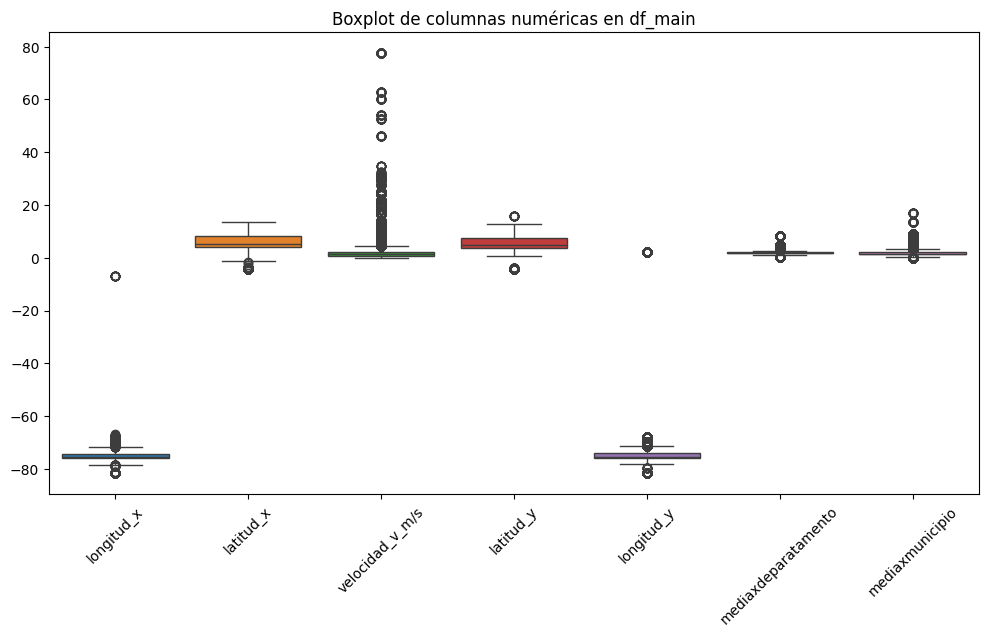

In [217]:
numeric_columns = df_main.select_dtypes(include='number')

# Crear el boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=numeric_columns)
plt.xticks(rotation=45)
plt.title("Boxplot de columnas numéricas en df_main")
plt.show()


<Axes: xlabel='velocidad_v_m/s'>

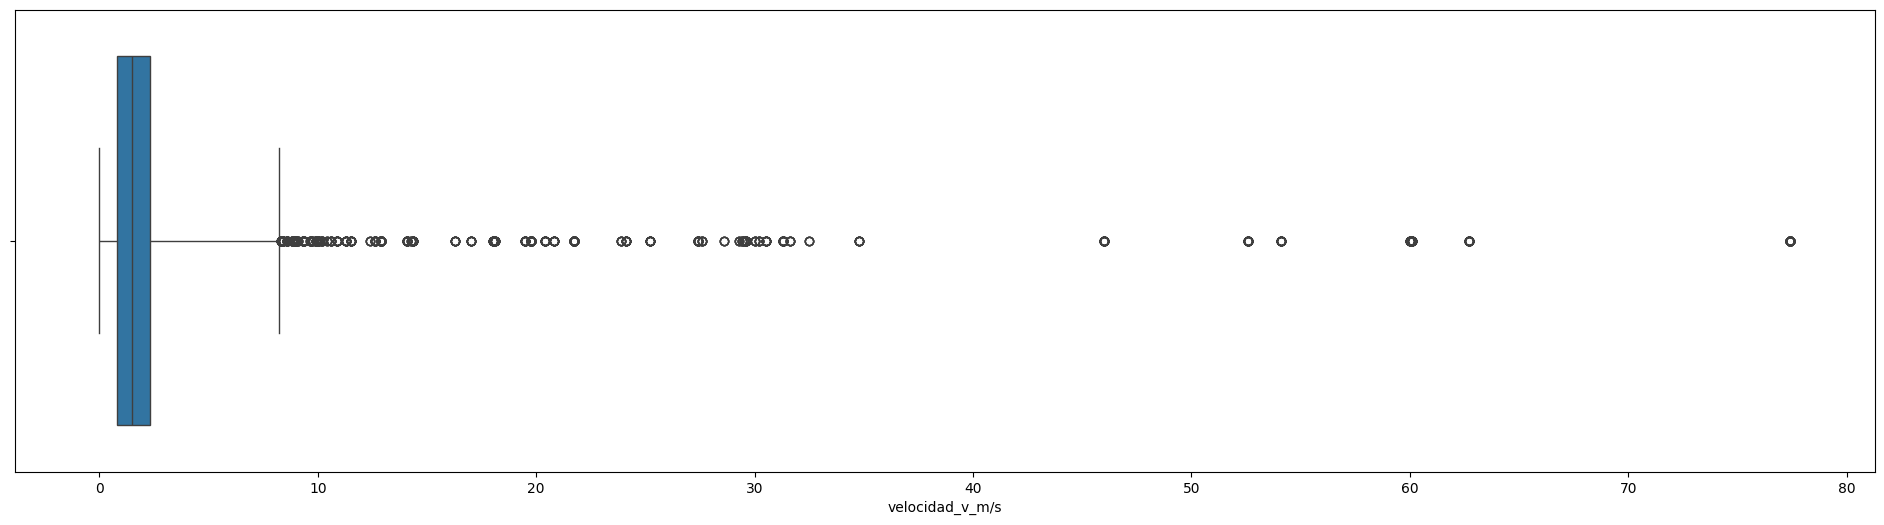

In [218]:
plt.figure(figsize=(24, 6))
# Remove the 'kind' argument, as it's not needed for sns.boxplot
sns.boxplot(x=df_viabilidad['velocidad_v_m/s'], whis=4)

<Axes: xlabel='días_lluvia_año'>

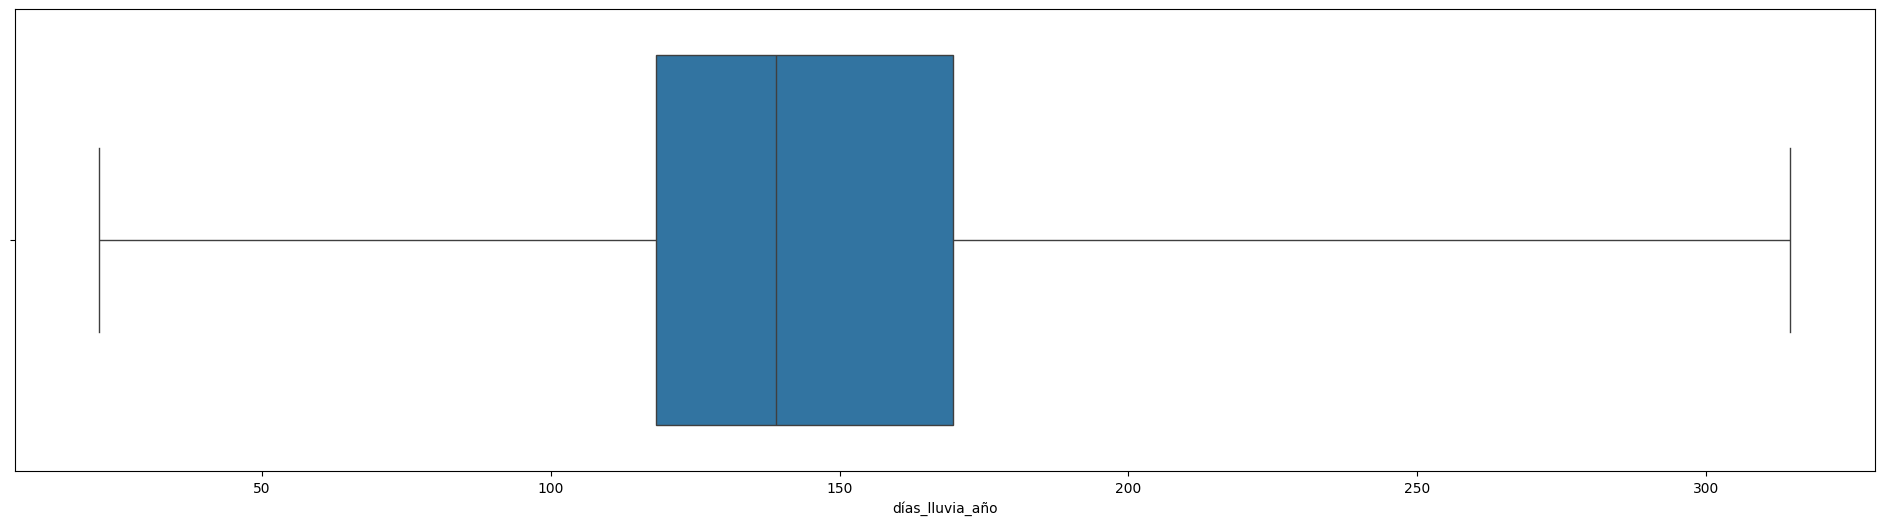

In [220]:
plt.figure(figsize=(24, 6))
# Remove the 'kind' argument, as it's not needed for sns.boxplot
sns.boxplot(x=df_viabilidad['días_lluvia_año'], whis=4)

## Modelo regresion logistica

In [221]:
# Entrenamiento del Modelo
modelo_logistico = LogisticRegression()
modelo_logistico.fit(x_train, y_train)

LogisticRegression()

In [222]:
y_predict_logistic = modelo_logistico.predict(x_test)

In [223]:
# Evaluación del Modelo
accuracy = accuracy_score(y_test, y_predict_logistic)
confusion = confusion_matrix(y_test, y_predict_logistic)
classification_rep = classification_report(y_test, y_predict_logistic)

print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.23      0.29      7578
           1       0.67      0.83      0.74     15798
           2       0.00      0.00      0.00       883

    accuracy                           0.62     24259
   macro avg       0.35      0.36      0.34     24259
weighted avg       0.56      0.62      0.57     24259



/home/usuario/proyectos/renovaPred/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/usuario/proyectos/renovaPred/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/usuario/proyectos/renovaPred/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

In [224]:
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(confusion)

Accuracy: 0.616101240776619
Confusion Matrix:
[[ 1762  5816     0]
 [ 2614 13184     0]
 [  247   636     0]]


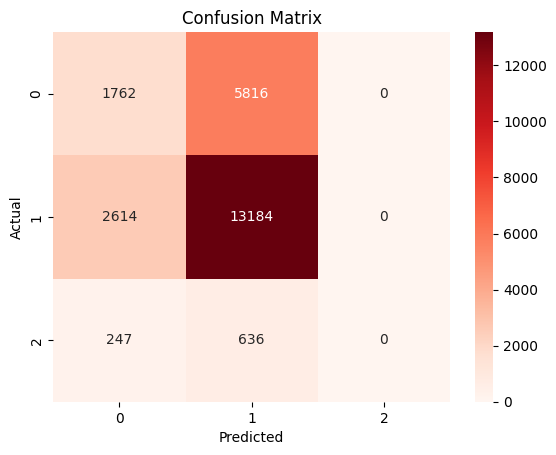

In [225]:
sns.heatmap(confusion, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Modelo Ramdon Forest para predecir el tipo d proyectos de energía renovable en Chile

In [226]:
# Entrenar el modelo Random Forest
modeloRF = RandomForestClassifier(n_estimators=100, random_state=42)
modeloRF.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [227]:
y_predict_rf = modeloRF.predict(x_test)

In [228]:
# Evaluación del Modelo
accuracy = accuracy_score(y_test, y_predict_rf)
confusion = confusion_matrix(y_test, y_predict_rf)
classification_rep = classification_report(y_test, y_predict_rf)

print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      7578
           1       1.00      1.00      1.00     15798
           2       0.49      0.32      0.39       883

    accuracy                           0.96     24259
   macro avg       0.80      0.76      0.77     24259
weighted avg       0.95      0.96      0.95     24259



In [229]:
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(confusion)

Accuracy: 0.957747640051115
Confusion Matrix:
[[ 7219    60   299]
 [   66 15732     0]
 [  598     2   283]]


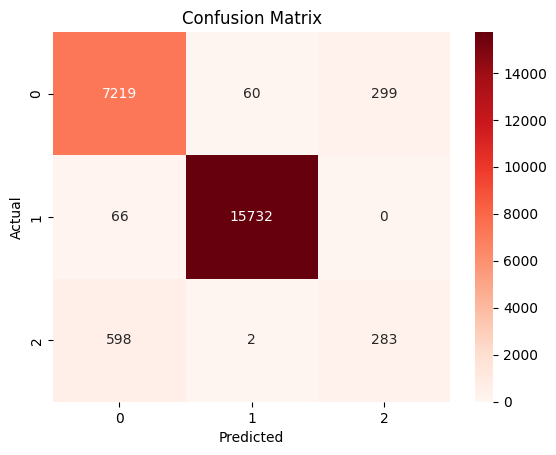

In [230]:
sns.heatmap(confusion, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [231]:
import pickle
with open('modelo.pkl', 'wb') as f:
    pickle.dump(modeloRF, f)